In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the dataset
file_path = 'landmarks_dataset_balanced_2_M_A_W_H.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(columns='label')  # 'label' is the target column
y = data['label']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier with the given parameters
xgb_model = XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=200, random_state=42)


True Positives (TP): 562
False Positives (FP): 61
True Negatives (TN): 490
False Negatives (FN): 58


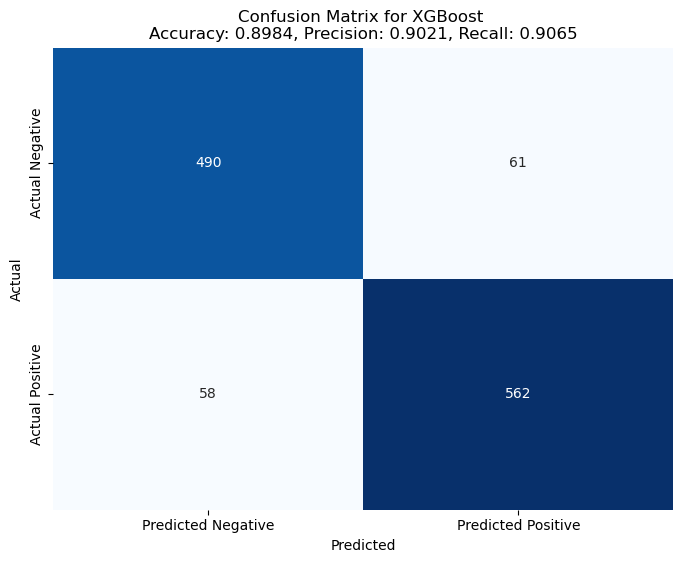

In [28]:
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for XGBoost \nAccuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}')
plt.savefig('confusion_matrix XGboost.png')
plt.show()